# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load The Dataset

In [2]:
df = pd.read_csv('Data_Science_Salaries.csv')
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...
3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,Large,2020
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,Large,2021
3297,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,Small,2020
3298,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,Large,2020


In [3]:
df.describe()

,Salary,Year
count,3.300000e+03,3300.000000
mean,2.046623e+05,2022.495455
std,7.279383e+05,0.716355
min,1.400000e+04,2020.000000
25%,9.416900e+04,2022.000000
50%,1.400000e+05,2023.000000
75%,1.900000e+05,2023.000000
max,3.040000e+07,2023.000000


In [4]:
df.describe(include='object')

,Job Title,Employment Type,Experience Level,Expertise Level,Salary Currency,Company Location,Company Size
count,3300,3300,3300,3300,3300,3300,3300
unique,111,4,4,4,22,71,3
top,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,Medium
freq,702,3261,2065,2065,2770,2495,2707


## Check Null Values

In [5]:
df.isnull().sum()

Job Title           0
Employment Type     0
Experience Level    0
Expertise Level     0
Salary              0
Salary Currency     0
Company Location    0
Company Size        0
Year                0
dtype: int64

## Check Data Type Of Each Column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         3300 non-null   object
 1   Employment Type   3300 non-null   object
 2   Experience Level  3300 non-null   object
 3   Expertise Level   3300 non-null   object
 4   Salary            3300 non-null   int64 
 5   Salary Currency   3300 non-null   object
 6   Company Location  3300 non-null   object
 7   Company Size      3300 non-null   object
 8   Year              3300 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 232.2+ KB


## Checking Outliers

In [7]:
q1,q3=np.percentile(df['Salary'],[25,75])
q1,q3

(94169.0, 190000.0)

## Create Interquartile Range

In [8]:
iqr=q3-q1
iqr

95831.0

## Lower And Upper Extreme

In [9]:
lx=q1-1.5*iqr
ux=q3+1.5*iqr
lx,ux

(-49577.5, 333746.5)

In [10]:
df=df.loc[df['Salary']<ux]
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...
3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,Large,2021
3294,Data Specialist,Full-Time,Senior,Expert,165000,United States Dollar,United States,Large,2021
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,Large,2021
3297,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,Small,2020


## Create Salary Range

In [11]:
s=df['Salary'].max()
s

333500

In [12]:
sdf = list(range(0,int(s),45000))
sdf

[0, 45000, 90000, 135000, 180000, 225000, 270000, 315000]

In [13]:
def salary_range(salary):
    if(salary<=45000):
        return '0-45000'
    elif(salary<=90000):
        return '45000-90000'
    elif(salary<=135000):
        return '90000-135000'
    elif(salary<=180000):
        return '135000-180000'
    elif(salary<=225000):
        return '180000-225000'
    elif(salary<=270000):
        return '225000-270000'
    elif(salary<=315000):
        return '270000-315000'
    else:
        return '315000-above'
    
df['salary_range']=df['Salary'].apply(salary_range)
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Company Size,Year,salary_range
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,Medium,2023,180000-225000
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,Medium,2023,135000-180000
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,Medium,2023,180000-225000
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,Medium,2023,90000-135000
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,Medium,2023,135000-180000
...,...,...,...,...,...,...,...,...,...,...
3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,Large,2021,0-45000
3294,Data Specialist,Full-Time,Senior,Expert,165000,United States Dollar,United States,Large,2021,135000-180000
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,Large,2021,135000-180000
3297,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,Small,2020,90000-135000


## Categorize Job Title

In [14]:
df['Job Title'].unique()

array(['Data Engineer', 'Data Scientist', 'Analytics Engineer',
       'Business Intelligence Developer', 'Machine Learning Engineer',
       'Data Analyst', 'Decision Scientist', 'BI Developer',
       'Machine Learning Scientist', 'BI Analyst', 'Data Manager',
       'Business Intelligence Engineer', 'ML Engineer',
       'Data Science Manager', 'AI Programmer', 'Applied Scientist',
       'Data Analytics Manager', 'Research Engineer',
       'Research Scientist', 'Data Lead', 'Data Strategist',
       'Data Quality Analyst', 'Data Architect', 'AI Architect',
       'Computer Vision Engineer', 'Business Intelligence Analyst',
       'Principal Data Scientist', 'Staff Machine Learning Engineer',
       'Staff Data Scientist', 'Consultant Data Engineer',
       'Machine Learning Specialist', 'Head of Data',
       'Data Quality Engineer', 'Research Analyst',
       'Principal Machine Learning Engineer', 'Deep Learning Engineer',
       'Data Visualization Specialist', 'MLOps Engineer',

In [15]:
def category_job_title(job_category):
    a=['Principal Data Scientist', 'Data Scientist', 'Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Staff Data Scientist', 'Principal Data Analyst', 'Principal Data Engineer']
    b=['ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Researcher', 'Machine Learning Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Principal Machine Learning Engineer', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Manager']
    c=['Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst', 'Staff Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 'Finance Data Analyst']
    d=['Data Modeler', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 'Cloud Data Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    e=['Data Analytics Manager', 'Business Intelligence Engineer', 'Analytics Engineer', 'BI Data Engineer', 'Director of Data Science', 'BI Developer', 'Insight Analyst', 'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'Cloud Data Architect']
    f=['Data Strategist', 'Computer Vision Engineer', 'AI Developer', 'Head of Data']
    
    if job_category in a:
        return 'Data Scientist'
    elif job_category in b:
        return 'Machine Learning Engineer'
    elif job_category in c:
        return 'Data Analyst'
    elif job_category in d:
        return 'Data Engineer'
    elif job_category in e:
        return 'Business Intelligence and Analytics'
    elif job_category in f:
        return 'Other'
    else:
        return 'Uncategorized'
    
df['job_category']=df['Job Title'].apply(category_job_title)   

In [16]:
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Company Size,Year,salary_range,job_category
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,Medium,2023,180000-225000,Data Engineer
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,Medium,2023,135000-180000,Data Engineer
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,Medium,2023,180000-225000,Data Engineer
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,Medium,2023,90000-135000,Data Engineer
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,Medium,2023,135000-180000,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...
3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,Large,2021,0-45000,Data Engineer
3294,Data Specialist,Full-Time,Senior,Expert,165000,United States Dollar,United States,Large,2021,135000-180000,Uncategorized
3296,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,Large,2021,135000-180000,Data Scientist
3297,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,Small,2020,90000-135000,Data Scientist


## Yearwise Highest Salary

In [17]:
ydf=df.groupby('Year').agg(
yearwise_sal=('Salary','sum'))
ydf=ydf.reset_index().sort_values(by='yearwise_sal',ascending=False)
ydf

,Year,yearwise_sal
3,2023,297578335
2,2022,129778564
1,2021,20265759
0,2020,6555809


## Job Category Count

In [18]:
jdf=df['job_category'].value_counts()
jdf=jdf.reset_index().rename(columns={'index':'job_category','job_category':'count'})
jdf

,job_category,count
0,Data Scientist,788
1,Data Engineer,736
2,Data Analyst,500
3,Uncategorized,497
4,Machine Learning Engineer,426
5,Business Intelligence and Analytics,213
6,Other,48


## Job Category Experience Level With Highest Salary

In [19]:
ndf=df.groupby(['job_category']).agg(
high_sal=('Salary','sum'))
ndf=ndf.reset_index().sort_values(by='high_sal',ascending=False)
ndf

,job_category,high_sal
3,Data Scientist,115934687
2,Data Engineer,103845105
6,Uncategorized,71725926
4,Machine Learning Engineer,69955565
1,Data Analyst,53067354
0,Business Intelligence and Analytics,32285440
5,Other,7364390


# Experience Level Count

In [20]:
edf=df['Experience Level'].value_counts()
edf=edf.reset_index().rename(columns={'index':'Experience Level','Experience Level':'count'})
edf

,Experience Level,count
0,Senior,2029
1,Mid,759
2,Entry,279
3,Executive,141


# Employment Type Count

In [21]:
ecf=df['Employment Type'].value_counts()
ecf=ecf.reset_index().rename(columns={'index':'Employment Type','Employment Type':'count'})
ecf

,Employment Type,count
0,Full-Time,3171
1,Contract,14
2,Part-Time,13
3,Freelance,10


## salary_range-Count

In [22]:
sdf=df['salary_range'].value_counts()
sdf=sdf.reset_index().rename(columns={'index':'salary_range','salary_range':'count'})
sdf

,salary_range,count
0,90000-135000,788
1,135000-180000,769
2,45000-90000,622
3,180000-225000,509
4,225000-270000,228
5,0-45000,169
6,270000-315000,103
7,315000-above,20


## Salary Currency-Count

In [23]:
cdf=df['Salary Currency'].value_counts()
cdf=cdf.reset_index().rename(columns={'index':'Salary Currency','Salary Currency':'count'})
cdf

,Salary Currency,count
0,United States Dollar,2743
1,Euro,222
2,British Pound Sterling,179
3,Canadian Dollar,29
4,Australian Dollar,10
5,Polish Zloty,6
6,Singapore Dollar,6
7,Swiss Franc,5
8,Brazilian Real,3
9,Danish Krone,3


# Company LocationCount-Top 10

In [24]:
ldf=df['Company Location'].value_counts().head(10)
ldf=ldf.reset_index().rename(columns={'index':'Company Location','Company Location':'count'})
ldf

,Company Location,count
0,United States,2465
1,United Kingdom,249
2,Canada,104
3,Germany,64
4,Spain,47
5,France,42
6,Australia,21
7,Portugal,16
8,Netherlands,14
9,Brazil,12


# Expertise Level-Count

In [25]:
xcf=df['Expertise Level'].value_counts()
xcf=xcf.reset_index().rename(columns={'index':'Expertise Level','Expertise Level':'count'})
xcf

,Expertise Level,count
0,Expert,2029
1,Intermediate,759
2,Junior,279
3,Director,141


## Company Size-Count

In [26]:
adf=df['Company Size'].value_counts()
adf=adf.reset_index().rename(columns={'index':'Company Size','Company Size':'count'})
adf

,Company Size,count
0,Medium,2673
1,Large,395
2,Small,140


# Data Visualization

# Job Category

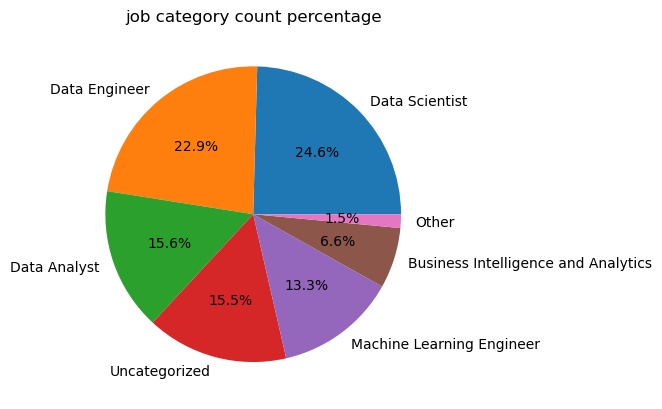

In [27]:
plt.pie(jdf['count'],labels=jdf['job_category'],autopct='%.1f%%')
plt.title('job category count percentage')
plt.show()

# Yearwise Salary Visualize

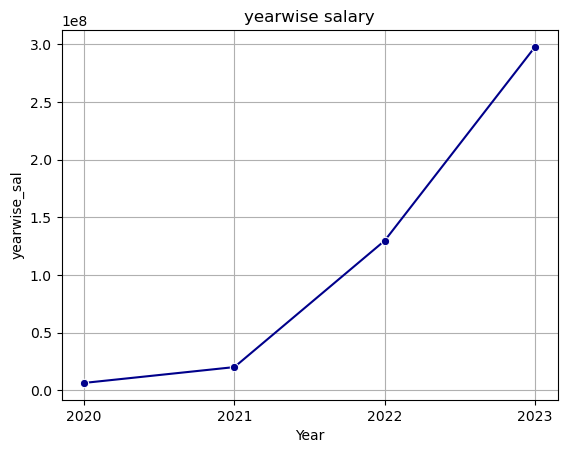

In [28]:
sns.lineplot(data=ydf,x='Year',y='yearwise_sal',color='#00008B',marker='o')
plt.xticks(np.arange(2020,2024,1))
plt.grid()
plt.title('yearwise salary')
plt.show()

## Job Category Salary Visualize

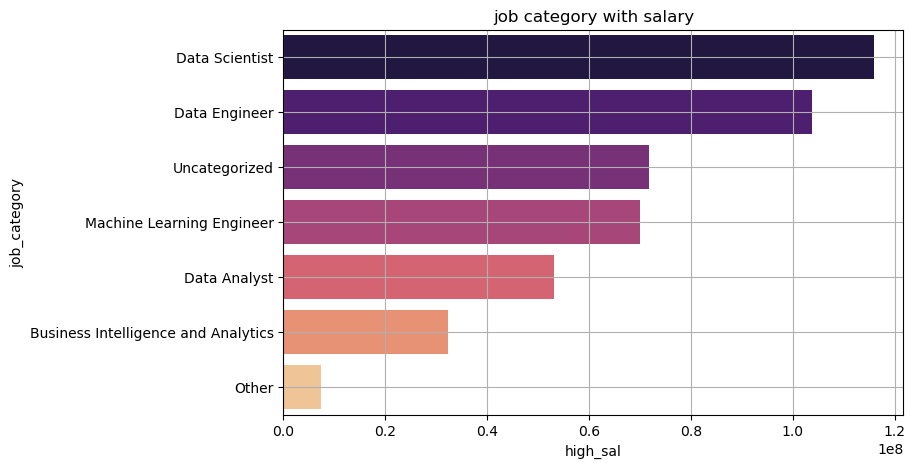

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(data=ndf,y='job_category',x='high_sal',palette='magma')
plt.grid()
plt.title('job category with salary')
plt.show()

## Salary CurrencyCount-Visualize

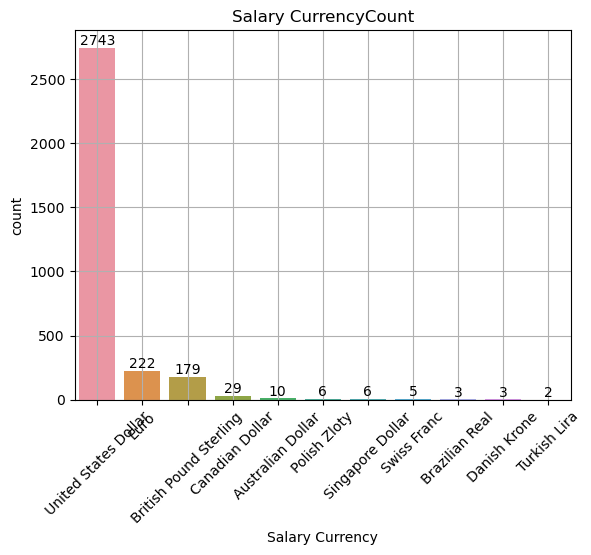

In [30]:
ax=sns.barplot(data=cdf,x='Salary Currency',y='count')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Salary CurrencyCount')
plt.grid()
plt.show()

# salary_rangeCount-Visualize

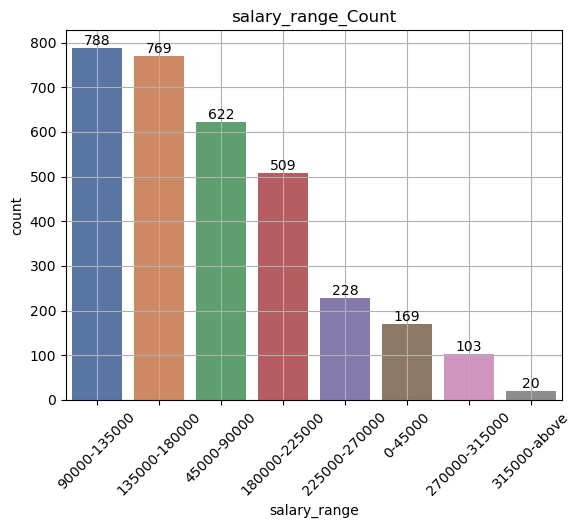

In [31]:
ax=sns.barplot(data=sdf,x='salary_range',y='count',palette='deep')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('salary_range_Count')
plt.grid()
plt.show()

# Job Category Count-Visualize

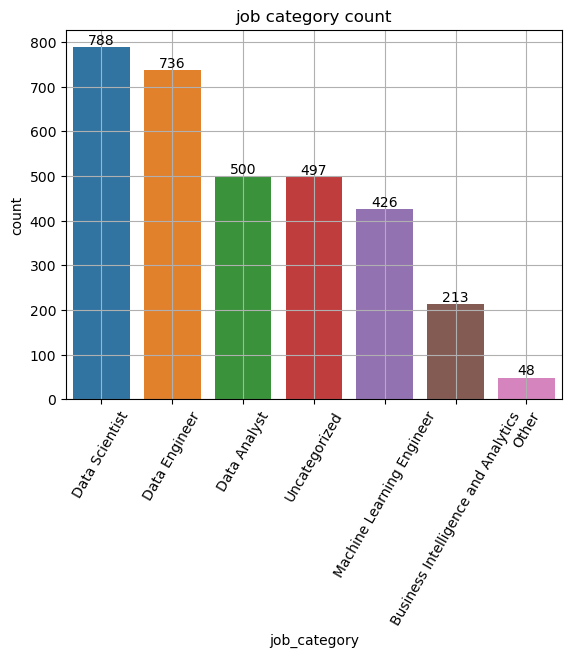

In [32]:
ax=sns.barplot(data=jdf,x='job_category',y='count')
ax.bar_label(ax.containers[0])
plt.title('job category count')
plt.xticks(rotation=60)
plt.grid()
plt.show()

# Company LocationCountTop 10-Visualize

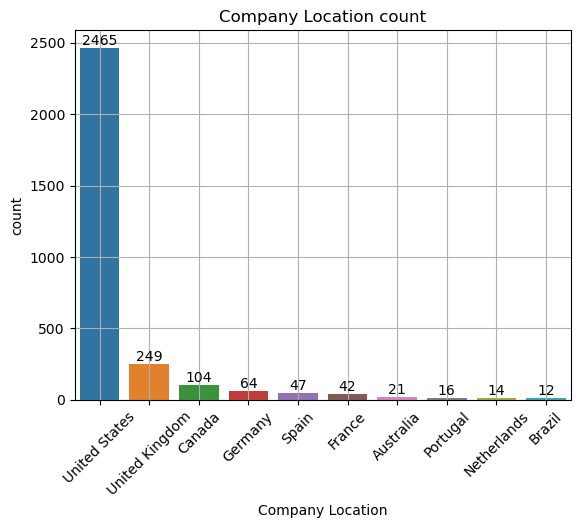

In [33]:
ax=sns.barplot(data=ldf,x='Company Location',y='count')
ax.bar_label(ax.containers[0])
plt.title('Company Location count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Employment Type Count-Visualize

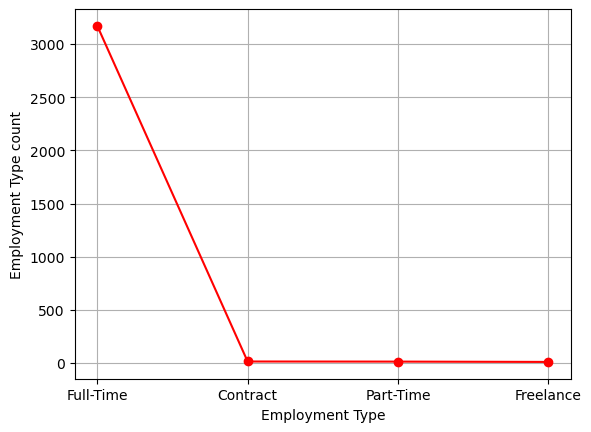

In [34]:
plt.plot(ecf['Employment Type'],ecf['count'],marker='o',color='red')
plt.xlabel('Employment Type')
plt.ylabel('Employment Type count')
plt.grid()
plt.show()

## Experience Level Count-Visualize

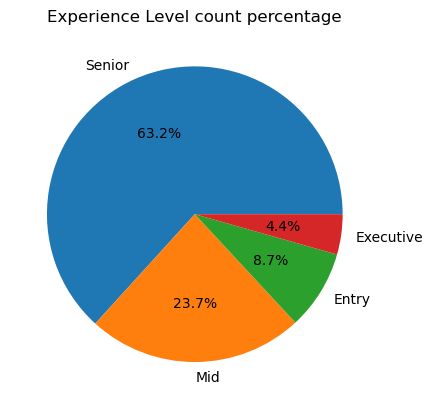

In [35]:
plt.pie(edf['count'],labels=edf['Experience Level'],autopct='%.1f%%')
plt.title('Experience Level count percentage')
plt.show()

# Expertise Level-Visualize

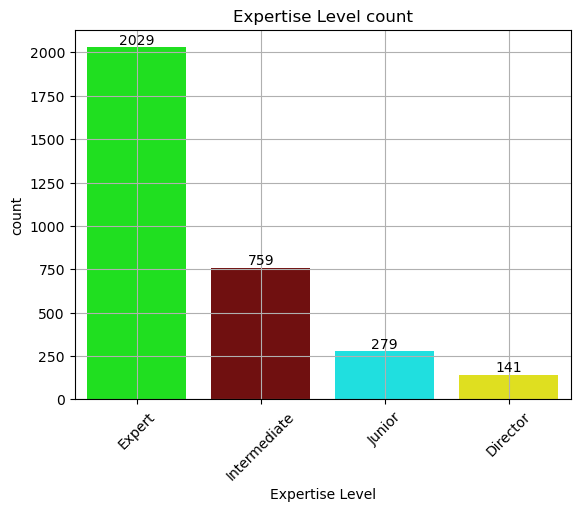

In [36]:
ax=sns.barplot(data=xcf,x='Expertise Level',y='count',palette=['#00FF00','#800000','#00FFFF','#FFFF00'])
ax.bar_label(ax.containers[0])
plt.title('Expertise Level count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Company SizeCount-Visualize

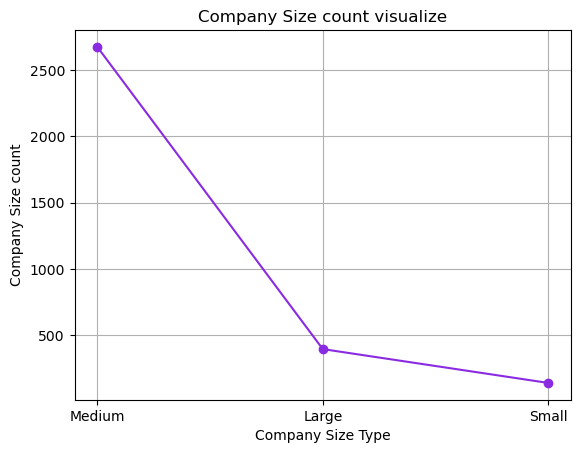

In [37]:
plt.plot(adf['Company Size'],adf['count'],marker='o',color='#8A2BE2')
plt.xlabel('Company Size Type')
plt.ylabel('Company Size count')
plt.title('Company Size count visualize')
plt.grid()
plt.show()

# job category experience level salary heatmap plot

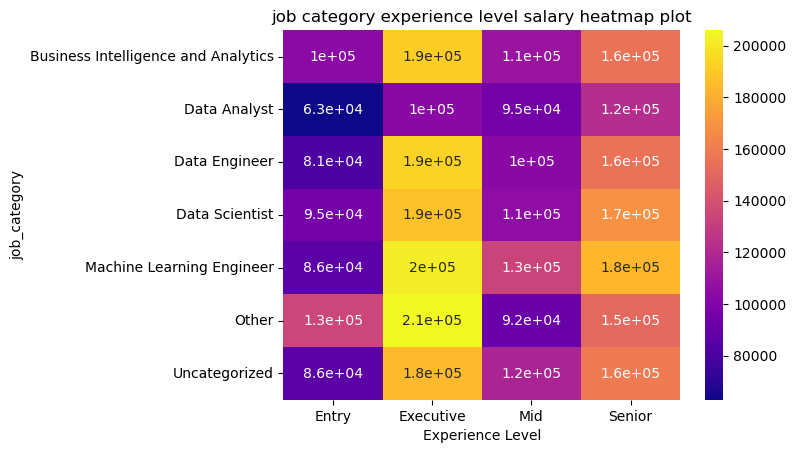

In [38]:
pivot_table=df.pivot_table(values='Salary',index=['job_category'],columns='Experience Level')
plt.title('job category experience level salary heatmap plot')
sns.heatmap(pivot_table,annot=True,cmap='plasma')
plt.show()

## The End

## Thankyou